# Lets play with a funny fake dataset. 
This dataset contains few features and it has an dependent variable which says if we are going ever to graduate or not

Importing few libraries

In [1]:
from sklearn import datasets,model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ipywidgets import interactive
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection

Then, we will load our fake dataset, and we will split our dataset in two parts, one for training and one for testing

In [2]:
student = pd.read_csv('LionForests-Bot/students2.csv')
feature_names = list(student.columns)[:-1]
class_names=["Won't graduate",'Will graduate (eventually)']
X = student.iloc[:, 0:-1].values
y = student.iloc[:, -1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state=0)

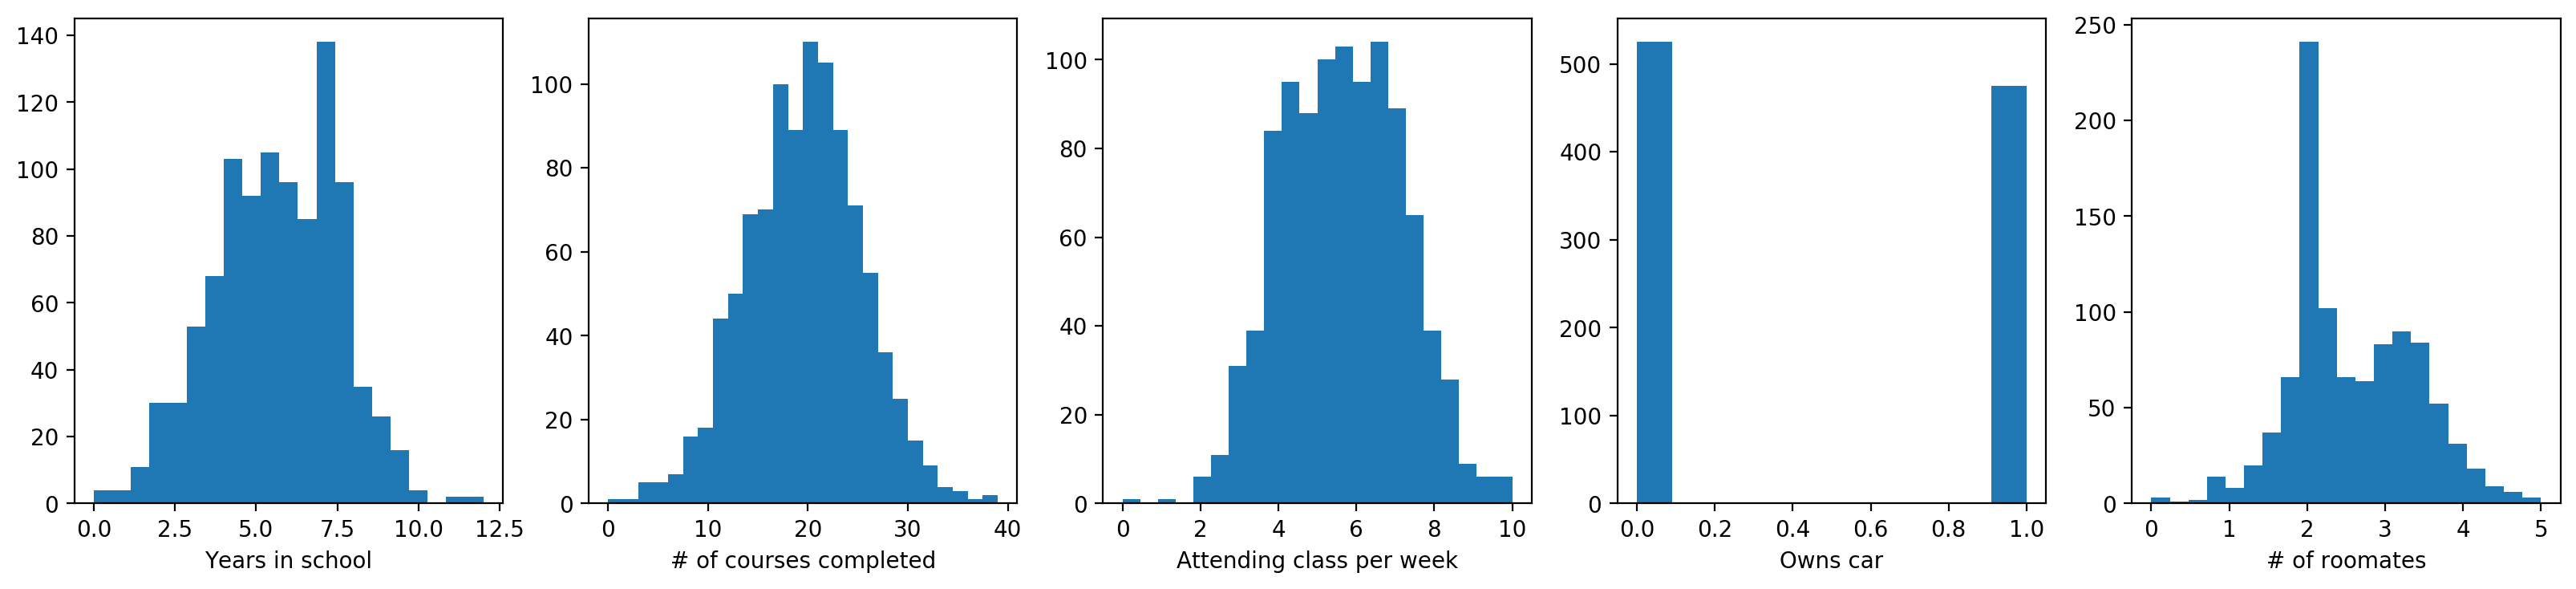

In [3]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,4), dpi=200)
ax1.hist(X[:,0:1], bins='auto')
ax1.set(xlabel='Years in school')
ax2.hist(X[:,1:2], bins='auto')
ax2.set(xlabel='# of courses completed')
ax3.hist(X[:,2:3], bins='auto')
ax3.set(xlabel='Attending class per week')
ax4.hist(X[:,3:4], bins='auto')
ax4.set(xlabel='Owns car')
ax5.hist(X[:,4:], bins='auto')
ax5.set(xlabel='# of roomates')
plt.show()

We are also scaling our data in the range [0,1] in order later the interpretations to be comparable

In [4]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Now, we will train a linear model, called logistic regression with our dataset. And we will evaluate its performance

In [5]:
#lin_model = LogisticRegression(solver="newton-cg",penalty='l2',max_iter=1000,C=100,random_state=0)
lin_model = LogisticRegression(solver="liblinear",penalty='l1',max_iter=1000,C=10,random_state=0)
lin_model.fit(x_train, y_train)
predicted_train = lin_model.predict(x_train)
predicted_test = lin_model.predict(x_test)
predicted_proba_test = lin_model.predict_proba(x_test)
print("Logistic Regression Model Performance:")
print("Accuracy in Train Set",accuracy_score(y_train, predicted_train))
print("Accuracy in Test Set",accuracy_score(y_test, predicted_test))

Logistic Regression Model Performance:
Accuracy in Train Set 0.8414285714285714
Accuracy in Test Set 0.85


To globally interpret this model, we will plot the weights of each variable/feature

Number of features: 5


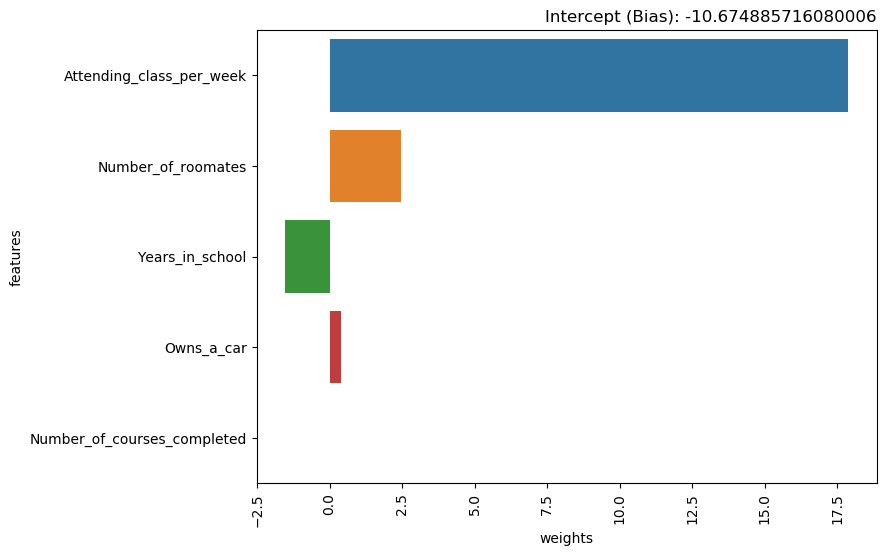

In [6]:
weights = lin_model.coef_
model_weights = pd.DataFrame({ 'features': list(feature_names),'weights': list(weights[0])})
#model_weights = model_weights.sort_values(by='weights', ascending=False) #Normal sort
model_weights = model_weights.reindex(model_weights['weights'].abs().sort_values(ascending=False).index) #Sort by absolute value
model_weights = model_weights[(model_weights["weights"] != 0)]    
print("Number of features:",len(model_weights.values))
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x="weights", y="features", data=model_weights)
plt.title("Intercept (Bias): "+str(lin_model.intercept_[0]),loc='right')
plt.xticks(rotation=90)
plt.show()